# Community Detection

**Importing Data and converting it to a graph**

In [1]:
import pandas as pd
import networkx as nx

# Loading CSV file into a pandas DataFrame
df = pd.read_csv('/Users/pranav/Documents/SMA Project/Dataset/subgraph.csv')

# Creating a new empty graph
G = nx.Graph()

# Adding edges from DataFrame to the graph
for index, row in df.iterrows():
    G.add_edge(row['source'], row['target'])

# Printing the number of nodes and edges in the graph
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

Number of nodes: 13142
Number of edges: 318785


## Modularity Analysis

Modularity analysis is a method employed to detect subgroups or communities within a network. These communities are characterized by nodes that exhibit a higher likelihood of being interconnected with each other compared to nodes outside the community.

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import community
import random
from networkx.drawing.nx_agraph import graphviz_layout

In [3]:
dendrogram = community.generate_dendrogram(G)

In [4]:
# Finding the number of levels of a dendrogram
print(len(dendrogram))

3


In [5]:
for level in range(len(dendrogram)):
    
    result = community.partition_at_level(dendrogram, level)
    
    # Find the number of communities at each level
    print('Number of communities at level',level,'=', len(set(result.values())))
    
    # Modularity score ar each level
    print('Modularity at level',level,'=', community.modularity(result, G))

Number of communities at level 0 = 280
Modularity at level 0 = 0.7438746158986123
Number of communities at level 1 = 31
Modularity at level 1 = 0.7961468003382094
Number of communities at level 2 = 27
Modularity at level 2 = 0.7964015888776926


**We can observe that the modularity increases at each level and communities decrease**

**From the above information, the modularity at level 2 is highest.**

In [6]:
# Computing the partition of the graph nodes which maximises the modularity using the Louvain heuristices
part = community.best_partition(G) 
print(community.modularity(part, G))

0.7956524686381592


0 13142
1 280
2 31


/opt/anaconda3/envs/SMA/lib/python3.12/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning: Warning: 1 is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


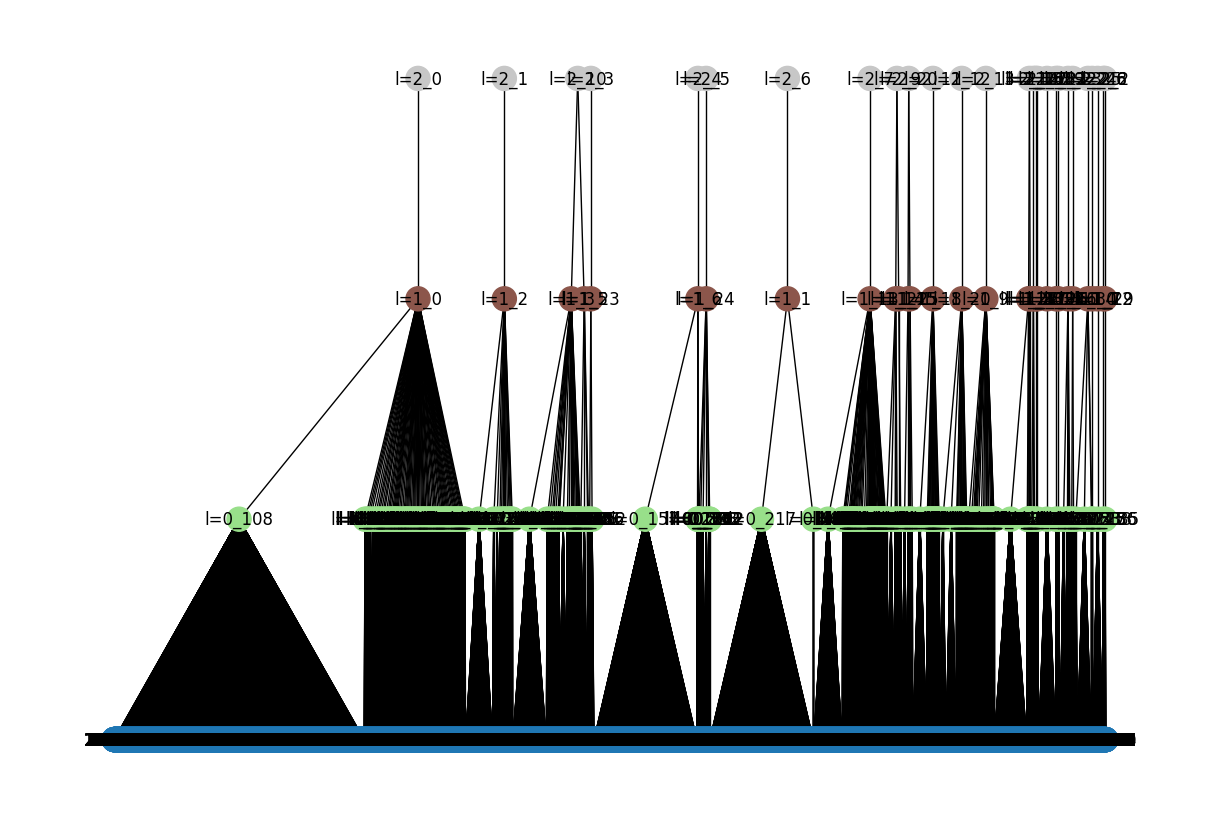

In [7]:
pg = nx.DiGraph()

last_part = None
for l, part in enumerate(dendrogram):
    print(l, len(part))
    for n, comm in part.items():
        # level = ?, community = ?
        nom = "l={}_{}".format(l, comm)
        pg.add_node(nom, comm=comm, color=l+1)

        if l == 0:
            pg.add_node(n, comm=comm, color=0)
            pg.add_edge(nom, n)
        else: 
            pg.add_edge(nom, "l={}_{}".format(l-1, n))
    last_part = part
plt.figure(figsize=(12,8))

colors = list(nx.get_node_attributes(pg, 'color').values())

pos = graphviz_layout(pg, prog='dot')
nx.draw(pg, pos, with_labels=True, arrows=False, node_color=colors, vmin=0, vmax=len(dendrogram) + 1, cmap=plt.cm.tab20)

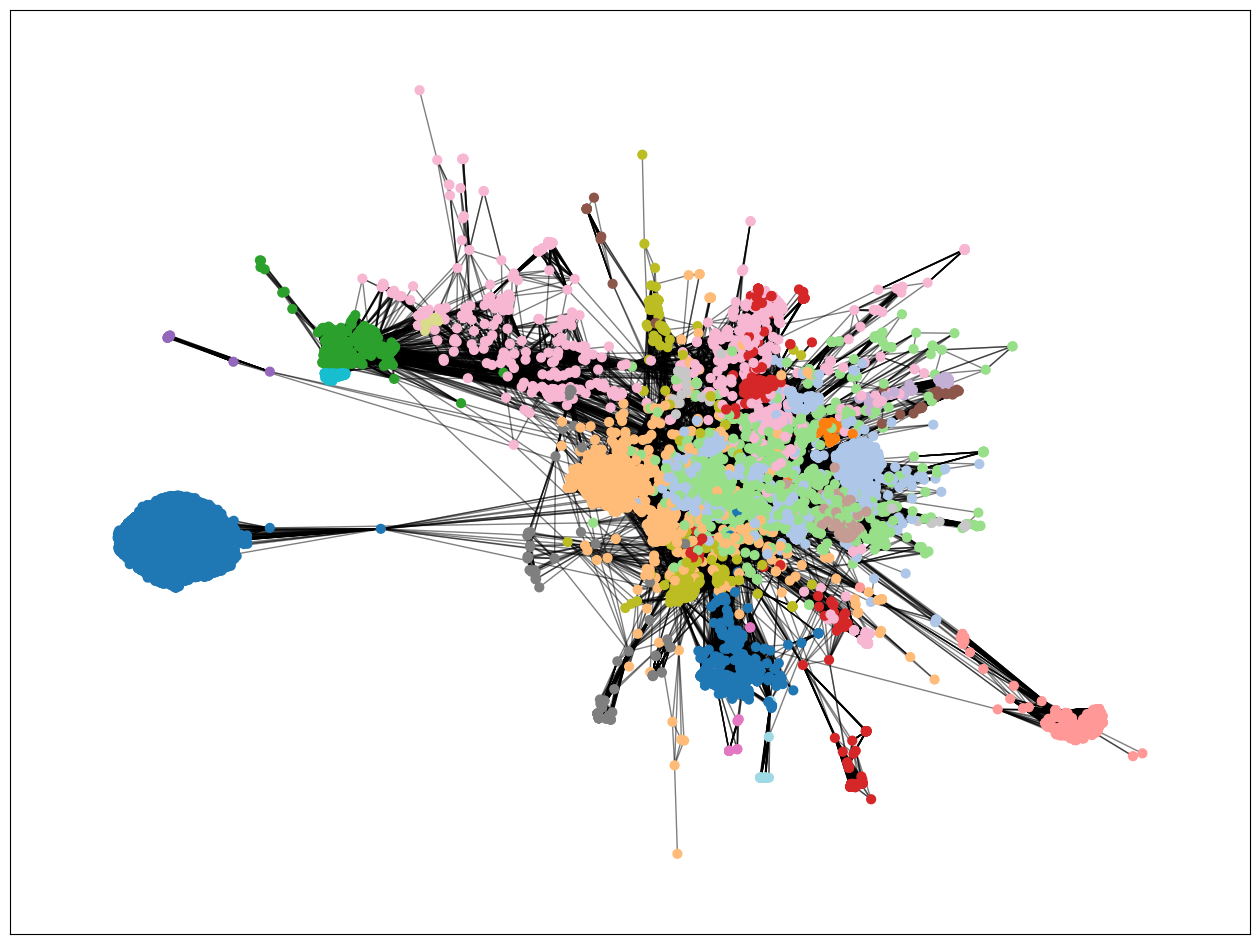

In [8]:
plt.figure(figsize=(16, 12))

partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
node_list = [n for n, n_com in sorted(partition.items())]
node_colors = [n_com for n, n_com in sorted(partition.items())]
    
nx.draw_networkx_nodes(G, pos, node_list, node_size=40, 
                       # the arguments below here make each community a different color
                       vmin=0, vmax=size,
                       node_color=node_colors, cmap=plt.cm.tab20)
    #print(count)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

### Graph Clustering and Hierarchical Graph Clustering

In [9]:
list_final_values=[]
print( ' The Analysis of top 5 communities by size at each level 0 , 1 and 2')
for level in range(len(dendrogram)) :
    communities = community.partition_at_level(dendrogram, level)
    print('Number of communities at level',level, '=' ,len(set(communities.values())))
    
    # Making a dictionary that maps the community ID to a list of nodes in that community
    community_dict = {i: []  for i in set(communities.values())}
    
    # Making a dictionary that maps community ids with the number of nodes in that community
    community_size = {c: 0 for c in set(communities.values())}
    
    #loop though the nodes in communities output with corresponding community ids
    for node,comm in communities.items() :
    
        # Append each node into a community
        community_dict[comm].append(node)
        
        #Update the community size after adding each node to a community
      
        community_size[comm] += community_size[comm]
    
        # sorts the community_size in descending order
        sorted_community_dict = sorted(community_size.items(), key=lambda k: (k[1], k[0]), reverse=True)
        
    # Take top 3; list of their community ids
    Top_5_communities = [ s[0] for s in sorted_community_dict[:5] ]
    for t in Top_5_communities:
        sub_graph = nx.subgraph(G,community_dict[t])
        
        # Number of nodes and edges
        print('Number of nodes =', sub_graph.number_of_nodes()) 
        print('The number of edges =', sub_graph.number_of_edges())
        
        #Diameter of the sub graph
        print('Diameter =' , nx.diameter(sub_graph))
        
        # Density of subgraph
        print('Density =', nx.density(sub_graph))
        
        # Average shortest path of the sub graph
        print('Average Shortest Path Length =', nx.average_shortest_path_length(sub_graph))
        
        # Average sclustering coefficient
        print('Average Clustering =',nx.average_clustering(sub_graph))
        
        # Storing all these values to later use in a dataframe
        
        list_final=[sub_graph.number_of_nodes(), sub_graph.number_of_edges(),nx.diameter(sub_graph),nx.density(sub_graph),nx.average_shortest_path_length(sub_graph),
                   nx.average_clustering(sub_graph)]
        
        list_final_details=[]
        list_final_details.append(list_final)
        list_final_values.append(list_final_details)
      
        print('**********************************')
    print('___________________________________________________________')

 The Analysis of top 5 communities by size at each level 0 , 1 and 2
Number of communities at level 0 = 280
Number of nodes = 10
The number of edges = 45
Diameter = 1
Density = 1.0
Average Shortest Path Length = 1.0
Average Clustering = 1.0
**********************************
Number of nodes = 25
The number of edges = 151
Diameter = 2
Density = 0.5033333333333333
Average Shortest Path Length = 1.4966666666666666
Average Clustering = 0.8401975084188034
**********************************
Number of nodes = 31
The number of edges = 463
Diameter = 2
Density = 0.9956989247311828
Average Shortest Path Length = 1.0043010752688173
Average Clustering = 0.9956777371682822
**********************************
Number of nodes = 16
The number of edges = 67
Diameter = 2
Density = 0.5583333333333333
Average Shortest Path Length = 1.4416666666666667
Average Clustering = 0.8165809884559885
**********************************
Number of nodes = 11
The number of edges = 55
Diameter = 1
Density = 1.0
Average Sh

### Dendrogram Analysis

In [11]:
level=2
result_level2 = community.partition_at_level(dendrogram, level)

#print the number of communities
print('Number of communities =', len(set(result_level2.values())))

# Making a dictionary that maps the community ID to a list of nodes in that community
c_dict = {c : [] for c in set(result_level2.values())}

# Making a dictionary that maps community ids with the number of nodes in that community
c_size = {c : 0 for c in set(result_level2.values())}

for node, comm in result_level2.items() :
    
        # Append each node into a community
        c_dict[comm].append(node)
        
        #Update the community size after adding each node to a community
        c_size[comm] = c_size[comm] + 1
        
for community, size in c_size.items():
    print(' Community ', community, ' has Size =', size)
    sub_g = nx.subgraph(G,c_dict[community])
    print('Number of nodes =', sub_g.number_of_nodes())
    print('Number of edges =', sub_g.number_of_edges())

    #Diameter of the sub graph
    print('Diameter =' , nx.diameter(sub_g))

    # Density of subgraph
    print('Density =', nx.density(sub_g))

    # Average shortest path of the sub graph
    print('Average Shortest Path Length =', nx.average_shortest_path_length(sub_g))

    # Average sclustering coefficient
    print('Average Clustering =',nx.average_clustering(sub_g))
    
    print('______________________')

Number of communities = 27
 Community  0  has Size = 4659
Number of nodes = 4659
Number of edges = 102270
Diameter = 2
Density = 0.009425101957816793
Average Shortest Path Length = 1.9905748980421831
Average Clustering = 0.8365254724000242
______________________
 Community  1  has Size = 624
Number of nodes = 624
Number of edges = 13665
Diameter = 5
Density = 0.07030188912211384
Average Shortest Path Length = 2.011277112400708
Average Clustering = 0.8189630851422037
______________________
 Community  2  has Size = 24
Number of nodes = 24
Number of edges = 276
Diameter = 1
Density = 1.0
Average Shortest Path Length = 1.0
Average Clustering = 1.0
______________________
 Community  3  has Size = 66
Number of nodes = 66
Number of edges = 933
Diameter = 3
Density = 0.43496503496503497
Average Shortest Path Length = 1.7934731934731936
Average Clustering = 0.9021855723273798
______________________
 Community  4  has Size = 1390
Number of nodes = 1390
Number of edges = 52543
Diameter = 5
Densi

### Finding k-cliques using the CPM method

In [12]:
sorted_dict = sorted(c_size.items(), key=lambda k: (k[1], k[0]), reverse=True)
print(sorted_dict[:1])
top_n_comm = [s[0] for s in sorted_dict[:1]]
print(top_n_comm)

[(0, 4659)]
[0]


In [13]:
t = top_n_comm[0]
top_comm = c_dict[t]
print('Community with length =', len(G))
print(" ")
for k in range(5, 18):
    kcliq = nx.community.k_clique_communities(G, k=k)
    num = len([cliq for cliq in kcliq])
    print('Number of ', k, 'cliques =', num)

Community with length = 13142
 
Number of  5 cliques = 180
Number of  6 cliques = 192
Number of  7 cliques = 159
Number of  8 cliques = 154
Number of  9 cliques = 139
Number of  10 cliques = 139
Number of  11 cliques = 139
Number of  12 cliques = 140
Number of  13 cliques = 138
Number of  14 cliques = 125
Number of  15 cliques = 358
Number of  16 cliques = 500
Number of  17 cliques = 500
